In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy

In [2]:
df=pd.read_csv('magicbricks_Ready_to_Move_Flats_50_Pages.csv')

In [3]:
df.head()

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
0,807.0,2 BHK,Unfurnished,Bathroom 2,Sudarshan Paradise,65 Lac,NaN,Ready to Move
1,973.0,3 BHK,Unfurnished,Bathroom 3,Shapoorji Pallonji Sensorium,1.32 Cr,NaN,NaN
2,640.0,2 BHK,NaN,Bathroom 2,Forest Hills,37 Lac,7 out of 7,Ready to Move
3,894.0,2 BHK,NaN,Bathroom 2,Kundan Espacio,1.20 Cr,3 out of 13,Ready to Move
4,560.0,1 BHK,NaN,Bathroom 1,Tarangan Apartment,90 Lac,2 out of 3,Ready to Move


In [4]:
df.shape

(1500, 8)

In [5]:
df = df.drop_duplicates()

In [6]:
df.isnull().sum()

,0
Area,1
Property,0
Furnished Status,23
Bathroom,1
Society,5
Price,0
Floor,18
Status,2


In [7]:
df.describe()

,Area
count,1492.000000
mean,601.656836
std,239.208653
min,87.000000
25%,438.000000
50%,562.000000
75%,702.000000
max,3096.000000


In [8]:
# so the property and price don't have missing value
df.dropna(axis=1)

,Property,Price
0,2 BHK,65 Lac
1,3 BHK,1.32 Cr
2,2 BHK,37 Lac
3,2 BHK,1.20 Cr
4,1 BHK,90 Lac
...,...,...
1495,2 BHK,80 Lac
1496,1 BHK,30 Lac
1497,1 BHK,40 Lac
1498,1 BHK,32 Lac


<Axes: >

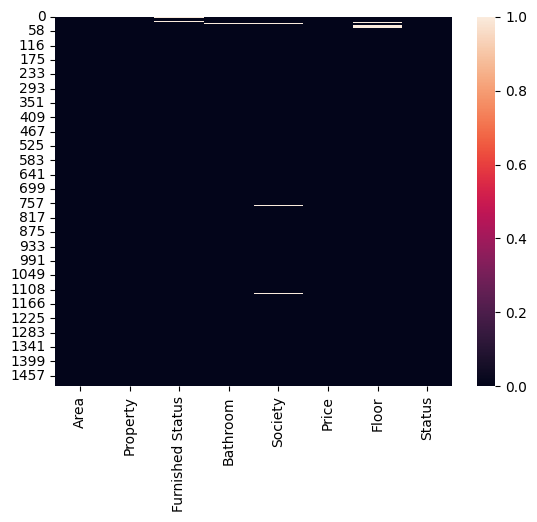

In [9]:
sns.heatmap(df.isnull())

In [10]:
df = df.dropna(subset=['Floor'])

In [11]:
df = df.dropna(subset=['Status'])

In [12]:
df = df.dropna(subset=['Society'])

In [13]:
df = df.dropna(subset=['Bathroom'])

In [14]:
df = df.dropna(subset=['Furnished Status'])

In [15]:
df = df.dropna(subset=['Area'])

In [16]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
7,392.0,1 BHK,Unfurnished,Bathroom 1,Ishwar River Residency,32 Lac,12 out of 12,Ready to Move
8,471.0,1 BHK,Unfurnished,Bathroom 1,Kohinoor Majesty,21.5 Lac,5 out of 9,Ready to Move
9,525.0,1 BHK,Unfurnished,Bathroom 1,Sancheti Pratik Nagar,28 Lac,1 out of 3,Ready to Move
11,517.0,1 BHK,Unfurnished,Bathroom 1,Blossom,35 Lac,2 out of 11,Ready to Move
13,645.0,1 BHK,Unfurnished,Bathroom 2,Raga Homes,37 Lac,10 out of 11,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,Bathroom 2,Tropical Palms,80 Lac,1 out of 15,Ready to Move
1496,403.0,1 BHK,Semi-Furnished,Bathroom 1,Lotus Apartment,30 Lac,3 out of 4,Ready to Move
1497,454.0,1 BHK,Unfurnished,Bathroom 1,Florida Minis,40 Lac,2 out of 5,Ready to Move
1498,491.0,1 BHK,Unfurnished,Bathroom 1,Swaraj Complex,32 Lac,1 out of 7,Ready to Move


In [17]:
def convert_cr_to_lac_clean(price):
    if isinstance(price, str):
        if 'Cr' in price:
            cr_value = float(price.split()[0])
            lac_value = cr_value * 100
            return f"{lac_value:.0f} Lac"
        elif 'Lac' in price:
            return price
    return price

df['Price'] = df['Price'].apply(convert_cr_to_lac_clean)

In [18]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
7,392.0,1 BHK,Unfurnished,Bathroom 1,Ishwar River Residency,32 Lac,12 out of 12,Ready to Move
8,471.0,1 BHK,Unfurnished,Bathroom 1,Kohinoor Majesty,21.5 Lac,5 out of 9,Ready to Move
9,525.0,1 BHK,Unfurnished,Bathroom 1,Sancheti Pratik Nagar,28 Lac,1 out of 3,Ready to Move
11,517.0,1 BHK,Unfurnished,Bathroom 1,Blossom,35 Lac,2 out of 11,Ready to Move
13,645.0,1 BHK,Unfurnished,Bathroom 2,Raga Homes,37 Lac,10 out of 11,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,Bathroom 2,Tropical Palms,80 Lac,1 out of 15,Ready to Move
1496,403.0,1 BHK,Semi-Furnished,Bathroom 1,Lotus Apartment,30 Lac,3 out of 4,Ready to Move
1497,454.0,1 BHK,Unfurnished,Bathroom 1,Florida Minis,40 Lac,2 out of 5,Ready to Move
1498,491.0,1 BHK,Unfurnished,Bathroom 1,Swaraj Complex,32 Lac,1 out of 7,Ready to Move


In [19]:
df['Price'].isnull().sum()

np.int64(0)

In [20]:
df['Price'] = df['Price'].str.replace('Lac', '', regex=False).str.strip()


In [21]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
7,392.0,1 BHK,Unfurnished,Bathroom 1,Ishwar River Residency,32,12 out of 12,Ready to Move
8,471.0,1 BHK,Unfurnished,Bathroom 1,Kohinoor Majesty,21.5,5 out of 9,Ready to Move
9,525.0,1 BHK,Unfurnished,Bathroom 1,Sancheti Pratik Nagar,28,1 out of 3,Ready to Move
11,517.0,1 BHK,Unfurnished,Bathroom 1,Blossom,35,2 out of 11,Ready to Move
13,645.0,1 BHK,Unfurnished,Bathroom 2,Raga Homes,37,10 out of 11,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,Bathroom 2,Tropical Palms,80,1 out of 15,Ready to Move
1496,403.0,1 BHK,Semi-Furnished,Bathroom 1,Lotus Apartment,30,3 out of 4,Ready to Move
1497,454.0,1 BHK,Unfurnished,Bathroom 1,Florida Minis,40,2 out of 5,Ready to Move
1498,491.0,1 BHK,Unfurnished,Bathroom 1,Swaraj Complex,32,1 out of 7,Ready to Move


In [22]:
print(list(df['Price']))

['32', '21.5', '28', '35', '37', '65', '75', '55', '30', '42', '249', '55', '80', '53', '58', '35', '25', '70', '31', '40', '40', '107', '46', '46', '60', '39', '72', '25', '20', '15', '56', '43', '31', '30', '80', '75', '25', '63', '125', '55', '40', '26', '80', '65', '30', '18.5', '24', '75', '55', '30', '13', '42', '33', '30', '52', '21', '95', '20', '22', '34', '40', '21', '44', '48', '50', '35', '12', '32', '55', '25', '45', '48', '17', '90', '42', '45', '60', '36.5', '22', '99', '35', '60', '59', '53', '35', '140', '38', '45', '65', '35', '66', '26', '36', '41.5', '54', '50', '75', '29', '17', '62', '57', '31', '94', '21', '28', '30', '60', '50', '11.8', '35', '70', '33', '44', '32', '40', '42', '52', '28', '65', '45', '22', '110', '50', '46', '42', '70', '58', '45', '39', '31', '52', '25.5', '20', '40', '130', '80', '36.5', '50', '135', '30', '83', '20', '40', '35', '46', '89', '40', '75', '21', '22', '40', '50', '38', '95', '32', '45', '280', '44', '20', '14', '65', '42', '36',

In [23]:
df = df.dropna(subset=['Price'])

In [24]:
df.isnull().sum()

,0
Area,0
Property,0
Furnished Status,0
Bathroom,0
Society,0
Price,0
Floor,0
Status,0


In [25]:
df['Bathroom']=df['Bathroom'].str.replace('Bathroom','')

In [26]:
df['Property']=df['Property'].str.replace('BHK','')

In [27]:
df['Area'] = df['Area'].astype(str).str.replace('.0', '', regex=False)


In [28]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
7,392,1,Unfurnished,1,Ishwar River Residency,32,12 out of 12,Ready to Move
8,471,1,Unfurnished,1,Kohinoor Majesty,21.5,5 out of 9,Ready to Move
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,1 out of 3,Ready to Move
11,517,1,Unfurnished,1,Blossom,35,2 out of 11,Ready to Move
13,645,1,Unfurnished,2,Raga Homes,37,10 out of 11,Ready to Move
...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,1 out of 15,Ready to Move
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,3 out of 4,Ready to Move
1497,454,1,Unfurnished,1,Florida Minis,40,2 out of 5,Ready to Move
1498,491,1,Unfurnished,1,Swaraj Complex,32,1 out of 7,Ready to Move


In [29]:
# First, split the 'Floor' column on ' out of '
df[['house_floor', 'building_floor']] = df['Floor'].str.extract(r'(\d+)\s+out of\s+(\d+)')
df=df.dropna(subset=['house_floor'])
df=df.dropna(subset=['building_floor'])
# Convert new columns to numeric
df['house_floor'] = df['house_floor'].astype(int)
df['building_floor'] = df['building_floor'].astype(int)

In [30]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status,house_floor,building_floor
7,392,1,Unfurnished,1,Ishwar River Residency,32,12 out of 12,Ready to Move,12,12
8,471,1,Unfurnished,1,Kohinoor Majesty,21.5,5 out of 9,Ready to Move,5,9
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,1 out of 3,Ready to Move,1,3
11,517,1,Unfurnished,1,Blossom,35,2 out of 11,Ready to Move,2,11
13,645,1,Unfurnished,2,Raga Homes,37,10 out of 11,Ready to Move,10,11
...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,1 out of 15,Ready to Move,1,15
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,3 out of 4,Ready to Move,3,4
1497,454,1,Unfurnished,1,Florida Minis,40,2 out of 5,Ready to Move,2,5
1498,491,1,Unfurnished,1,Swaraj Complex,32,1 out of 7,Ready to Move,1,7


In [31]:
df=df.rename(columns={"Area": "Area_sqft", "Property": "Property_BHK","house_floor":"House_floor",'Furnished Status':'Furnished_Status'})

In [32]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Floor,Status,House_floor,building_floor
7,392,1,Unfurnished,1,Ishwar River Residency,32,12 out of 12,Ready to Move,12,12
8,471,1,Unfurnished,1,Kohinoor Majesty,21.5,5 out of 9,Ready to Move,5,9
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,1 out of 3,Ready to Move,1,3
11,517,1,Unfurnished,1,Blossom,35,2 out of 11,Ready to Move,2,11
13,645,1,Unfurnished,2,Raga Homes,37,10 out of 11,Ready to Move,10,11
...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,1 out of 15,Ready to Move,1,15
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,3 out of 4,Ready to Move,3,4
1497,454,1,Unfurnished,1,Florida Minis,40,2 out of 5,Ready to Move,2,5
1498,491,1,Unfurnished,1,Swaraj Complex,32,1 out of 7,Ready to Move,1,7


In [33]:
df=df.drop('Floor',axis=1)

In [34]:
df.dtypes

,0
Area_sqft,object
Property_BHK,object
Furnished_Status,object
Bathroom,object
Society,object
Price,object
Status,object
House_floor,int64
building_floor,int64


In [35]:
df.isna().sum()

,0
Area_sqft,0
Property_BHK,0
Furnished_Status,0
Bathroom,0
Society,0
Price,0
Status,0
House_floor,0
building_floor,0


In [36]:
df['Property_BHK']=df['Property_BHK'].astype(int)
df['Bathroom']=df['Bathroom'].astype(int)
df['House_floor']=df['House_floor'].astype(int)
df['building_floor']=df['building_floor'].astype(int)
df['Price'] = df['Price'].astype(float).astype(int)

In [37]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,House_floor,building_floor
7,392,1,Unfurnished,1,Ishwar River Residency,32,Ready to Move,12,12
8,471,1,Unfurnished,1,Kohinoor Majesty,21,Ready to Move,5,9
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,Ready to Move,1,3
11,517,1,Unfurnished,1,Blossom,35,Ready to Move,2,11
13,645,1,Unfurnished,2,Raga Homes,37,Ready to Move,10,11
...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,Ready to Move,1,15
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,Ready to Move,3,4
1497,454,1,Unfurnished,1,Florida Minis,40,Ready to Move,2,5
1498,491,1,Unfurnished,1,Swaraj Complex,32,Ready to Move,1,7


In [38]:
sns.set(style="whitegrid")

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Price to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area_sqft'] = pd.to_numeric(df['Area_sqft'], errors='coerce')

# Price Range Mapping
def map_price_range(price):
    if pd.isna(price):
        return 'Unknown'
    for start in range(0, 280, 30):
        end = start + 30
        if start <= price < end:
            return f'{start}-{end}L'
    return '280L+'

# Area Range Mapping
def map_area_range(area):
    if pd.isna(area):
        return 'Unknown'
    for start in range(0, 1000, 200):
        end = start + 200
        if start <= area < end:
            return f'{start}-{end} sqft'
    return '1000+ sqft'

# Apply Mapping
df['Price_Range'] = df['Price'].map(map_price_range)
df['Area_Range'] = df['Area_sqft'].map(map_area_range)

In [40]:
df['Area_sqft'].max()


3096

In [41]:
from pandas.api.types import CategoricalDtype

# Define the correct order for price ranges
price_range_order = [
    '0-30L', '30-60L', '60-90L', '90-120L', '120-150L', '150-180L',
    '180-210L', '210-240L', '240-270L', '270-300L', '280L+'
]

# Set as ordered categorical
price_cat = CategoricalDtype(categories=price_range_order, ordered=True)
df['Price_Range'] = df['Price_Range'].astype(price_cat)

In [42]:
df.head()

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,House_floor,building_floor,Price_Range,Area_Range
7,392,1,Unfurnished,1,Ishwar River Residency,32,Ready to Move,12,12,30-60L,200-400 sqft
8,471,1,Unfurnished,1,Kohinoor Majesty,21,Ready to Move,5,9,0-30L,400-600 sqft
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,Ready to Move,1,3,0-30L,400-600 sqft
11,517,1,Unfurnished,1,Blossom,35,Ready to Move,2,11,30-60L,400-600 sqft
13,645,1,Unfurnished,2,Raga Homes,37,Ready to Move,10,11,30-60L,600-800 sqft


In [43]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,House_floor,building_floor,Price_Range,Area_Range
7,392,1,Unfurnished,1,Ishwar River Residency,32,Ready to Move,12,12,30-60L,200-400 sqft
8,471,1,Unfurnished,1,Kohinoor Majesty,21,Ready to Move,5,9,0-30L,400-600 sqft
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,Ready to Move,1,3,0-30L,400-600 sqft
11,517,1,Unfurnished,1,Blossom,35,Ready to Move,2,11,30-60L,400-600 sqft
13,645,1,Unfurnished,2,Raga Homes,37,Ready to Move,10,11,30-60L,600-800 sqft
...,...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,Ready to Move,1,15,60-90L,600-800 sqft
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,Ready to Move,3,4,30-60L,400-600 sqft
1497,454,1,Unfurnished,1,Florida Minis,40,Ready to Move,2,5,30-60L,400-600 sqft
1498,491,1,Unfurnished,1,Swaraj Complex,32,Ready to Move,1,7,30-60L,400-600 sqft


In [44]:
def categorize_floor(row):
    house_floor = row['House_floor']
    building_floor = row['building_floor']

    # Check for missing or invalid data
    if pd.isna(house_floor) or pd.isna(building_floor) or not isinstance(house_floor, (int, float)) or not isinstance(building_floor, (int, float)):
        return 'Unknown'

    # Ensure floor values are integers
    house_floor = int(house_floor)
    building_floor = int(building_floor)

    # Handle special cases like 'Ground' (assuming 0 if not numeric)
    if house_floor < 0 or building_floor <= 0:
        return 'Unknown'

    # Calculate thresholds for categorization
    top_threshold = building_floor * 0.75  # Top 25%
    low_threshold = building_floor * 0.25  # Bottom 25%

    # Categorize based on house floor position
    if house_floor >= top_threshold:
        return 'Top'
    elif house_floor >= low_threshold:
        return 'Mid'
    else:
        return 'Low'

# Apply the categorization function to create a new column
df['Floor_Category'] = df.apply(categorize_floor, axis=1)

# Save the updated DataFrame to a new CSV file
df.to_csv('magicbricks_Ready_to_Move_Flats_with_Floor_Category_large.csv', index=False)

# Display the first few rows to verify (optional, comment out for large datasets to save memory)
print(df[['House_floor', 'building_floor', 'Floor_Category']].head(10))

    House_floor  building_floor Floor_Category
7            12              12            Top
8             5               9            Mid
9             1               3            Mid
11            2              11            Low
13           10              11            Top
14            4               7            Mid
15            2               9            Low
16            4              10            Mid
18            7               7            Top
29            2               5            Mid


In [45]:
display(df.describe())

,Area_sqft,Property_BHK,Bathroom,Price,House_floor,building_floor
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,594.706506,1.656294,1.642150,53.556577,4.007072,7.671853
std,232.784750,0.671405,0.642298,42.448311,2.757211,4.380176
min,87.000000,0.000000,1.000000,10.000000,1.000000,1.000000
25%,436.000000,1.000000,1.000000,32.000000,2.000000,5.000000
50%,552.500000,2.000000,2.000000,44.000000,3.000000,7.000000
75%,694.000000,2.000000,2.000000,62.000000,5.000000,11.000000
max,3096.000000,6.000000,6.000000,600.000000,14.000000,80.000000


In [46]:
display(df.dtypes)

,0
Area_sqft,int64
Property_BHK,int64
Furnished_Status,object
Bathroom,int64
Society,object
Price,int64
Status,object
House_floor,int64
building_floor,int64
Price_Range,category


In [47]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,House_floor,building_floor,Price_Range,Area_Range,Floor_Category
7,392,1,Unfurnished,1,Ishwar River Residency,32,Ready to Move,12,12,30-60L,200-400 sqft,Top
8,471,1,Unfurnished,1,Kohinoor Majesty,21,Ready to Move,5,9,0-30L,400-600 sqft,Mid
9,525,1,Unfurnished,1,Sancheti Pratik Nagar,28,Ready to Move,1,3,0-30L,400-600 sqft,Mid
11,517,1,Unfurnished,1,Blossom,35,Ready to Move,2,11,30-60L,400-600 sqft,Low
13,645,1,Unfurnished,2,Raga Homes,37,Ready to Move,10,11,30-60L,600-800 sqft,Top
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,723,2,Semi-Furnished,2,Tropical Palms,80,Ready to Move,1,15,60-90L,600-800 sqft,Low
1496,403,1,Semi-Furnished,1,Lotus Apartment,30,Ready to Move,3,4,30-60L,400-600 sqft,Top
1497,454,1,Unfurnished,1,Florida Minis,40,Ready to Move,2,5,30-60L,400-600 sqft,Mid
1498,491,1,Unfurnished,1,Swaraj Complex,32,Ready to Move,1,7,30-60L,400-600 sqft,Low


In [48]:
# Let's Create all three distribution plots for each numerical column
def plot_numerical_analysis(df,column):
    plt.figure(figsize = (10,5)) # Create canvas

    # Histogram
    plt.subplot(2,2,1)
    sns.histplot(x = column, data = df,color = 'skyblue',edgecolor ='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    #Kdeplot
    plt.subplot(2,2,2)
    sns.kdeplot(x = column, data = df,color = 'magenta')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # boxplot
    plt.subplot(2,2,3)
    sns.boxplot(x = column, data = df,color = 'salmon')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

**Univariate Analysis : Non Visual**


In [49]:
# Dividing numerical and categorical dataframes.
numerical_df = df.select_dtypes(include=['int64','float64'])
cat_df =df.select_dtypes(include='object')

In [50]:
cat_df

,Furnished_Status,Society,Status,Area_Range,Floor_Category
7,Unfurnished,Ishwar River Residency,Ready to Move,200-400 sqft,Top
8,Unfurnished,Kohinoor Majesty,Ready to Move,400-600 sqft,Mid
9,Unfurnished,Sancheti Pratik Nagar,Ready to Move,400-600 sqft,Mid
11,Unfurnished,Blossom,Ready to Move,400-600 sqft,Low
13,Unfurnished,Raga Homes,Ready to Move,600-800 sqft,Top
...,...,...,...,...,...
1495,Semi-Furnished,Tropical Palms,Ready to Move,600-800 sqft,Low
1496,Semi-Furnished,Lotus Apartment,Ready to Move,400-600 sqft,Top
1497,Unfurnished,Florida Minis,Ready to Move,400-600 sqft,Mid
1498,Unfurnished,Swaraj Complex,Ready to Move,400-600 sqft,Low


In [51]:
numerical_df

,Area_sqft,Property_BHK,Bathroom,Price,House_floor,building_floor
7,392,1,1,32,12,12
8,471,1,1,21,5,9
9,525,1,1,28,1,3
11,517,1,1,35,2,11
13,645,1,2,37,10,11
...,...,...,...,...,...,...
1495,723,2,2,80,1,15
1496,403,1,1,30,3,4
1497,454,1,1,40,2,5
1498,491,1,1,32,1,7


In [52]:
numerical_df.columns

Index(['Area_sqft', 'Property_BHK', 'Bathroom', 'Price', 'House_floor',
       'building_floor'],
      dtype='object')

In [53]:
cat_df.columns

Index(['Furnished_Status', 'Society', 'Status', 'Area_Range',
       'Floor_Category'],
      dtype='object')

In [54]:
# Define a function to find unique, number of unique values, value counts.
def cat_univariate_analysis(df):
    for col in df:
        print("-"*10,df[col],"-"*10)
        print(df[col].agg(['count','nunique','unique']))
        print('Value counts : \n',df[col].value_counts())
        print()


In [55]:
cat_univariate_analysis(cat_df)

---------- 7          Unfurnished
8          Unfurnished
9          Unfurnished
11         Unfurnished
13         Unfurnished
             ...      
1495    Semi-Furnished
1496    Semi-Furnished
1497       Unfurnished
1498       Unfurnished
1499       Unfurnished
Name: Furnished_Status, Length: 1414, dtype: object ----------
count                                          1414
nunique                                           3
unique     [Unfurnished, Semi-Furnished, Furnished]
Name: Furnished_Status, dtype: object
Value counts : 
 Furnished_Status
Unfurnished       774
Semi-Furnished    452
Furnished         188
Name: count, dtype: int64

---------- 7       Ishwar River Residency
8             Kohinoor Majesty
9        Sancheti Pratik Nagar
11                     Blossom
13                  Raga Homes
                 ...          
1495            Tropical Palms
1496           Lotus Apartment
1497             Florida Minis
1498            Swaraj Complex
1499            Satyam Heights


In [56]:
numerical_df.describe()

,Area_sqft,Property_BHK,Bathroom,Price,House_floor,building_floor
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,594.706506,1.656294,1.642150,53.556577,4.007072,7.671853
std,232.784750,0.671405,0.642298,42.448311,2.757211,4.380176
min,87.000000,0.000000,1.000000,10.000000,1.000000,1.000000
25%,436.000000,1.000000,1.000000,32.000000,2.000000,5.000000
50%,552.500000,2.000000,2.000000,44.000000,3.000000,7.000000
75%,694.000000,2.000000,2.000000,62.000000,5.000000,11.000000
max,3096.000000,6.000000,6.000000,600.000000,14.000000,80.000000


**Univariate - Visual Analysis of Numerical Columns**

In [57]:
# Let's Create all three distribution plots for each numerical column
def plot_numerical_analysis(df,column):
    plt.figure(figsize = (10,5)) # Create canvas

    # Histogram
    plt.subplot(2,2,1)
    sns.histplot(x = column, data = df,color = 'skyblue',edgecolor ='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    #Kdeplot
    plt.subplot(2,2,2)
    sns.kdeplot(x = column, data = df,color = 'magenta')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # boxplot
    plt.subplot(2,2,3)
    sns.boxplot(x = column, data = df,color = 'salmon')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [58]:
numerical_df.columns

Index(['Area_sqft', 'Property_BHK', 'Bathroom', 'Price', 'House_floor',
       'building_floor'],
      dtype='object')

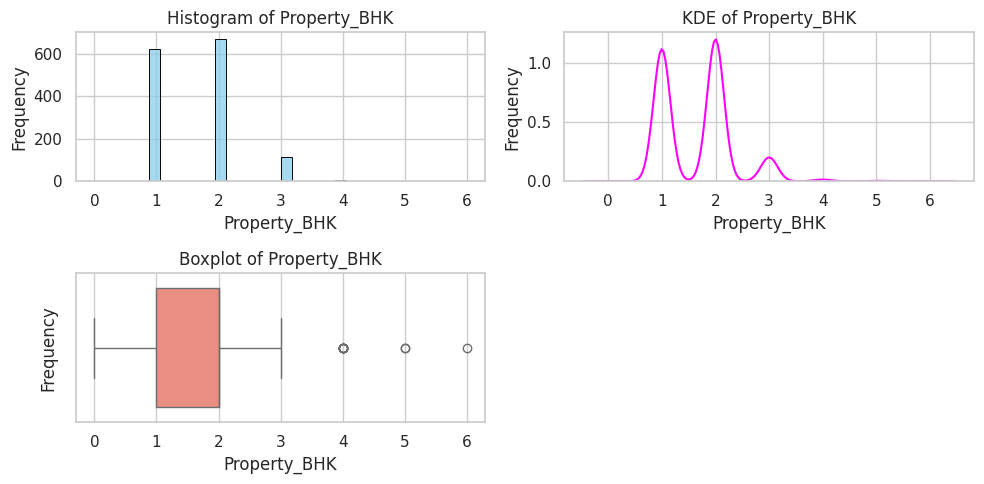

In [59]:
plot_numerical_analysis(numerical_df,'Property_BHK')

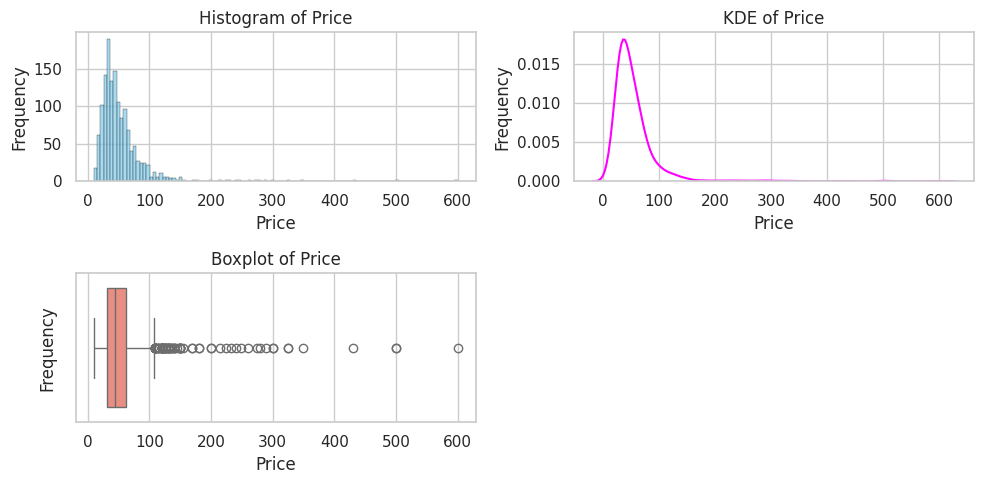

In [60]:
plot_numerical_analysis(numerical_df,'Price')

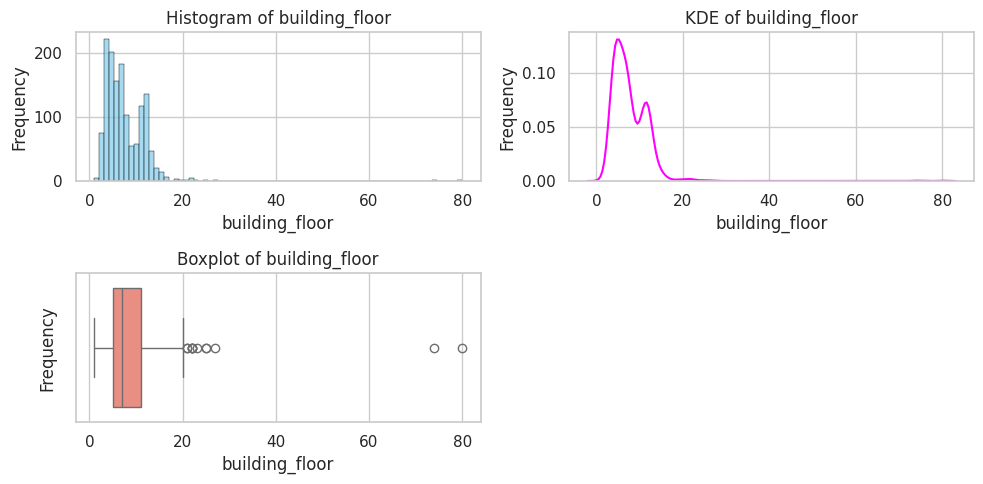

In [61]:
plot_numerical_analysis(numerical_df,'building_floor')

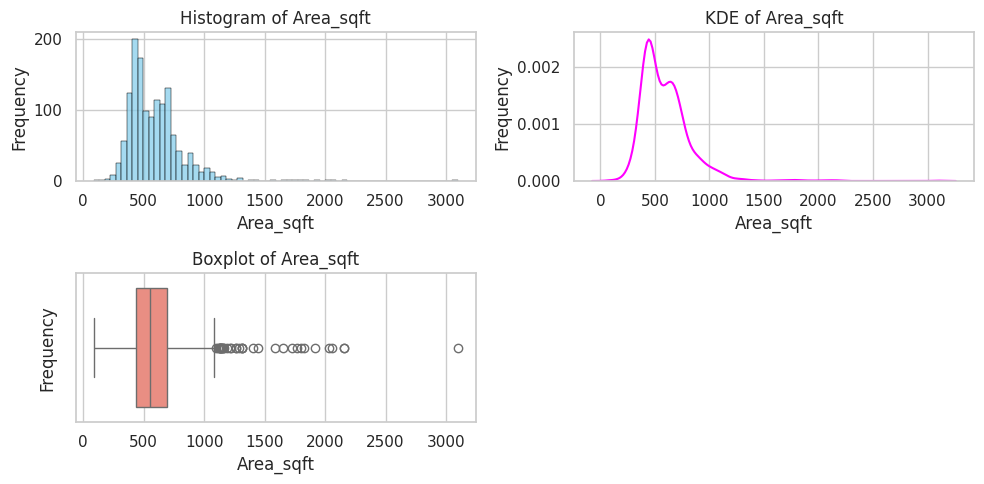

In [62]:
plot_numerical_analysis(numerical_df,'Area_sqft')

**Treating Outliers**

In [63]:
df.skew(numeric_only = True)

,0
Area_sqft,2.717053
Property_BHK,0.885587
Bathroom,0.846785
Price,5.526391
House_floor,1.033548
building_floor,6.161135


**Univariate - Visual Anlysis of Categorical Columns**

In [64]:
def plot_categorical_analysis(df,column):
    plt.figure(figsize=(18,18))
    # Pie chart - by using pandas functions
    plt.subplot(3,1,2)
    df[column].value_counts().nlargest(10).plot.pie(autopct = '%1.1f%%',color =sns.color_palette('Set2'))
    plt.title(f' Pie chartt of {column}')
    plt.tight_layout()
    plt.show()

In [65]:
cat_df.columns

Index(['Furnished_Status', 'Society', 'Status', 'Area_Range',
       'Floor_Category'],
      dtype='object')

,0
Area_sqft,"Axes(0.125,0.712609;0.352273x0.167391)"
Property_BHK,"Axes(0.547727,0.712609;0.352273x0.167391)"
Bathroom,"Axes(0.125,0.511739;0.352273x0.167391)"
Price,"Axes(0.547727,0.511739;0.352273x0.167391)"
House_floor,"Axes(0.125,0.31087;0.352273x0.167391)"
building_floor,"Axes(0.547727,0.31087;0.352273x0.167391)"


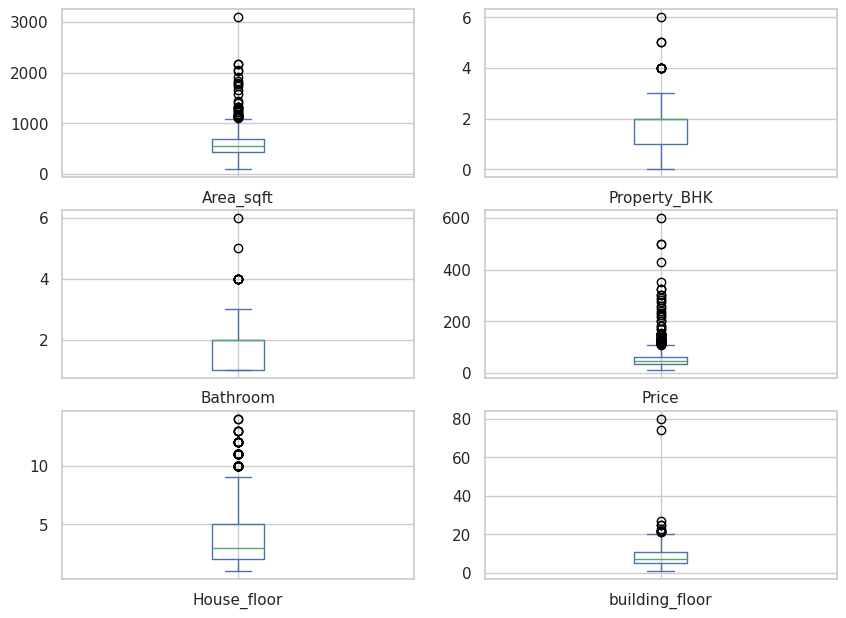

In [66]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

In [67]:
df=df.loc[df['Bathroom'] < 4]

In [68]:
df=df.loc[df['Property_BHK'] < 4]

In [69]:
df=df.loc[df['building_floor'] < 40]

In [70]:
df[df['building_floor']==80]

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,House_floor,building_floor,Price_Range,Area_Range,Floor_Category


**outliers**

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

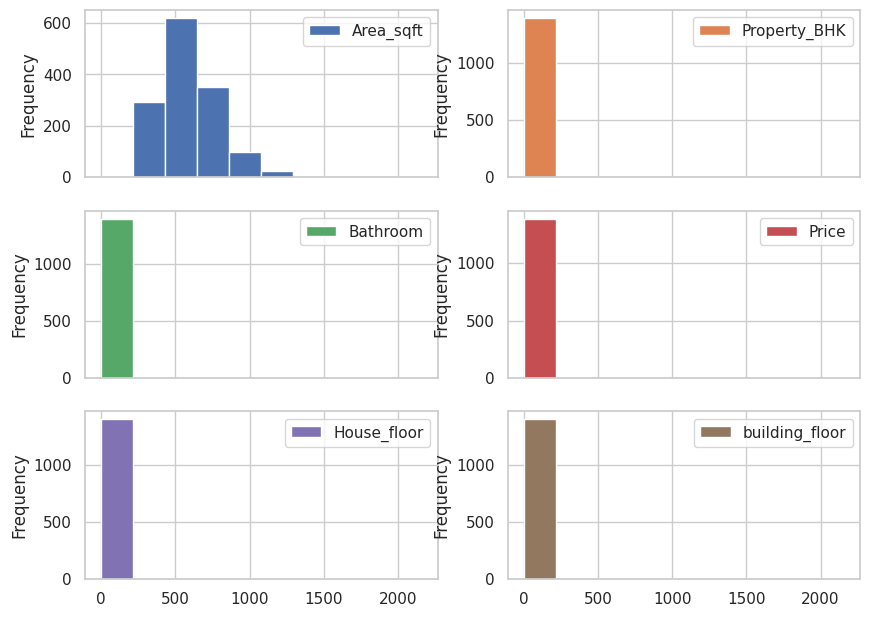

In [71]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

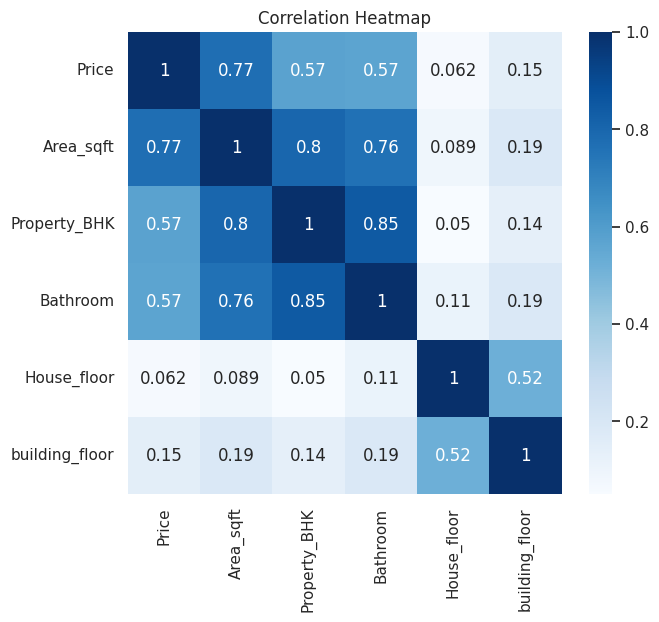

In [92]:
plt.figure(figsize=(7, 6))
sns.heatmap(df[['Price', 'Area_sqft', 'Property_BHK', 'Bathroom', 'House_floor', 'building_floor']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

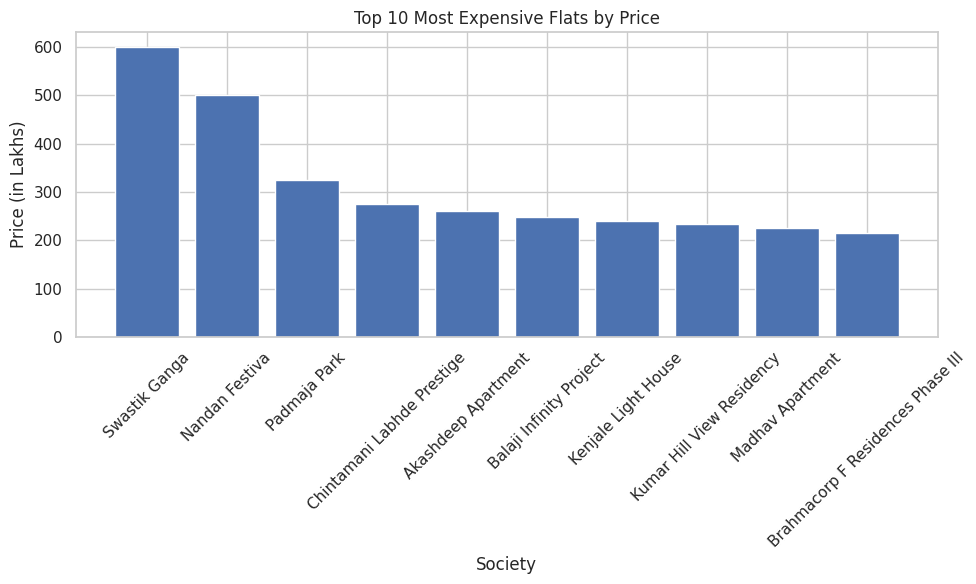

In [73]:
import matplotlib.pyplot as plt

# Get top 10 most expensive flats
top_10_flats = df[['Society', 'Price']].sort_values(by='Price', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_flats['Society'], top_10_flats['Price'])
plt.title("Top 10 Most Expensive Flats by Price")
plt.xlabel("Society")
plt.ylabel("Price (in Lakhs)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [74]:
df[df['Society'] == 'Swaraj Complex']

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,House_floor,building_floor,Price_Range,Area_Range,Floor_Category
1498,491,1,Unfurnished,1,Swaraj Complex,32,Ready to Move,1,7,30-60L,400-600 sqft,Low


In [75]:
df['Price'].max()

600

In [76]:
df[df['Price'] == df['Price'].max()]['Society']


,Society
848,Swastik Ganga


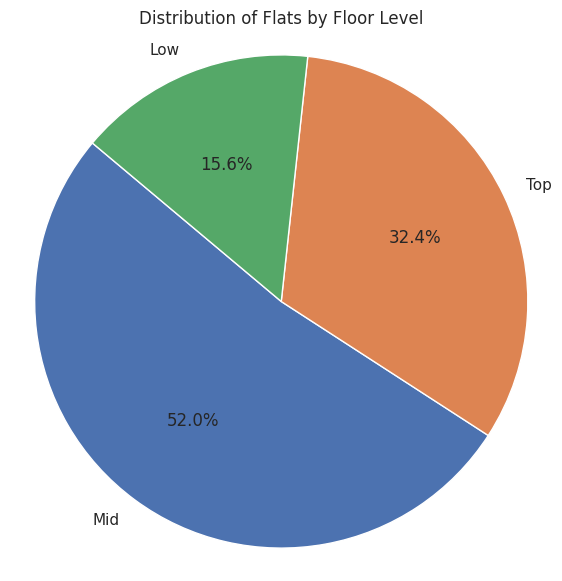

In [77]:
import matplotlib.pyplot as plt

# Count each floor category
floor_counts = df['Floor_Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(floor_counts, labels=floor_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Flats by Floor Level')
plt.axis('equal')  # Equal aspect ratio to make the pie circular
plt.show()

<Axes: xlabel='Price', ylabel='Property_BHK'>

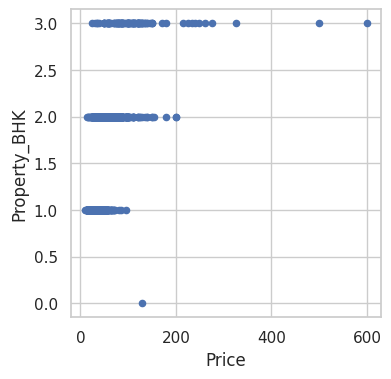

In [78]:
df.plot(kind='scatter', x='Price', y='Property_BHK', figsize=(4, 4))

<Axes: xlabel='Price', ylabel='House_floor'>

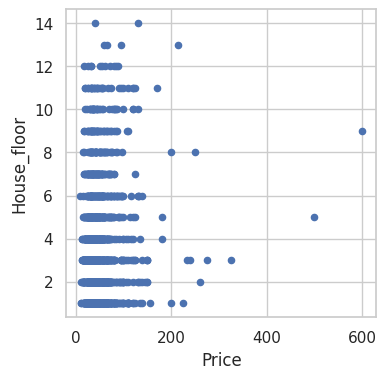

In [79]:
df.plot(kind='scatter', x='Price', y='House_floor', figsize=(4, 4))

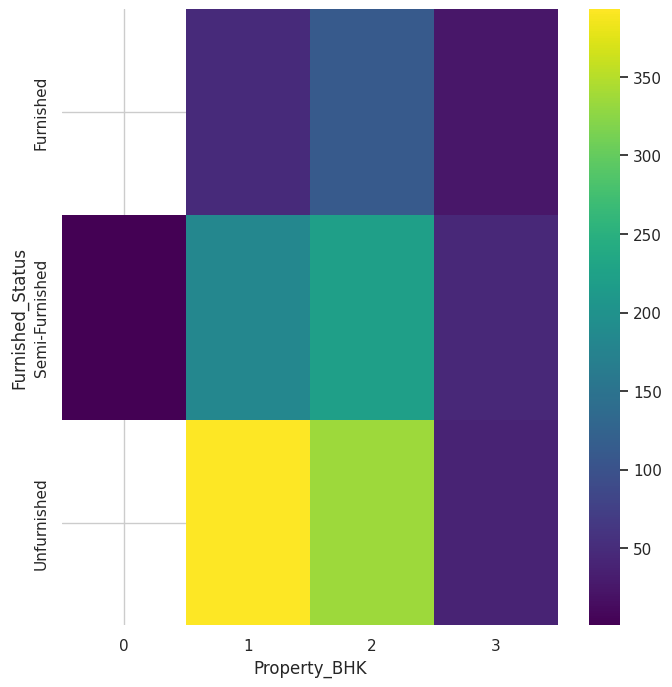

In [80]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Furnished_Status'].value_counts()
    for x_label, grp in df.groupby('Property_BHK')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Property_BHK')
_ = plt.ylabel('Furnished_Status')
plt.show()


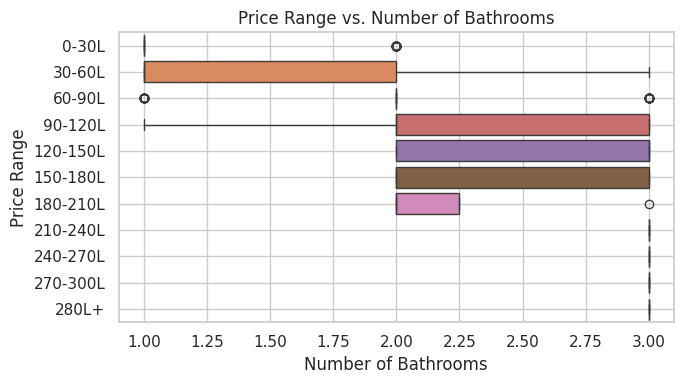

In [82]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Bathroom', y='Price_Range', palette='muted')
plt.title('Price Range vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price Range')
plt.grid(True)
plt.tight_layout()
plt.show()

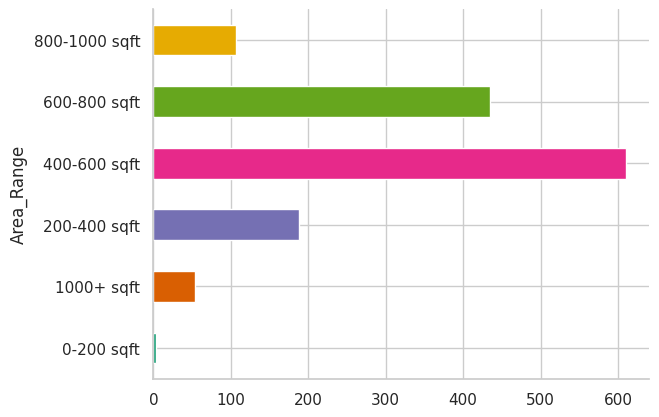

In [83]:
# @title Area_Range

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Area_Range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

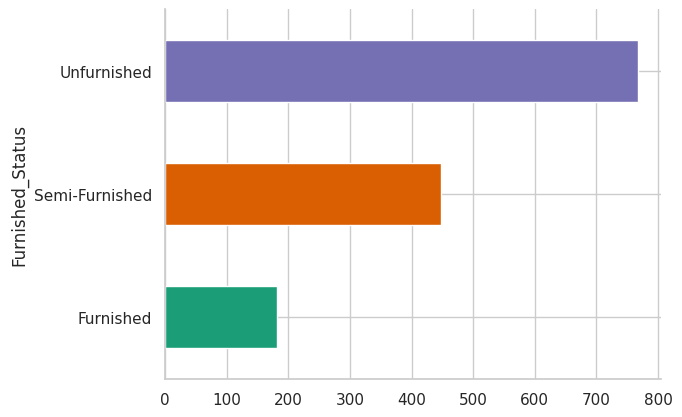

In [84]:
# @title Furnished_Status

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Furnished_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

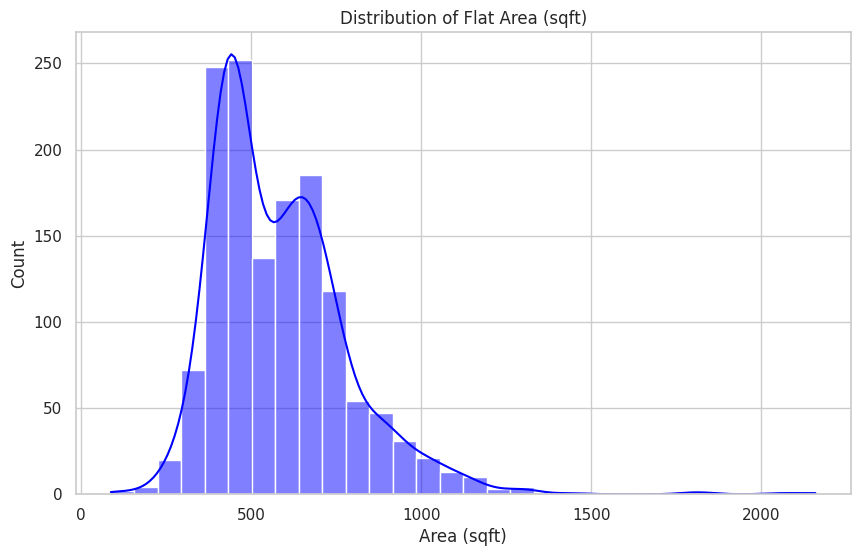

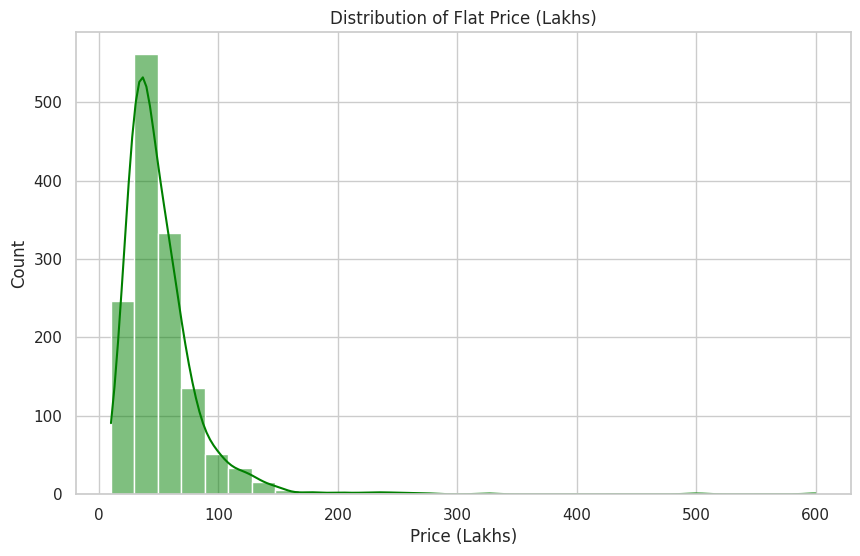

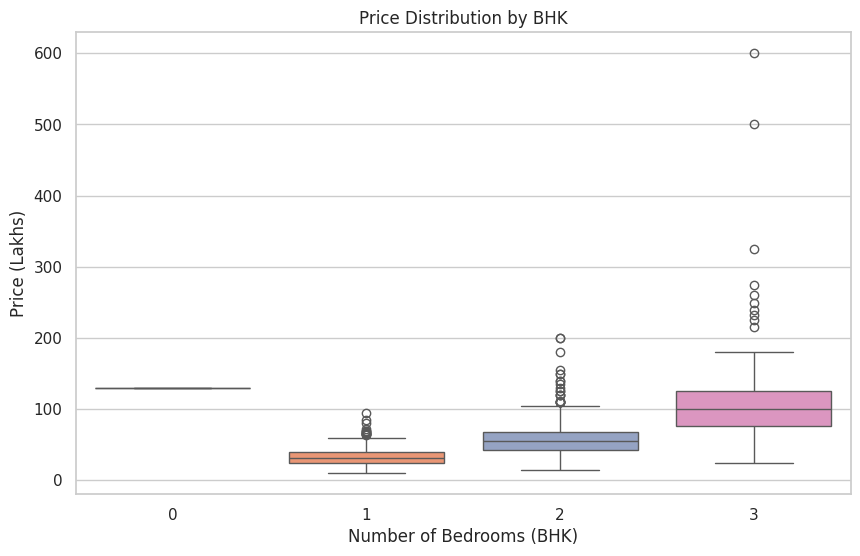

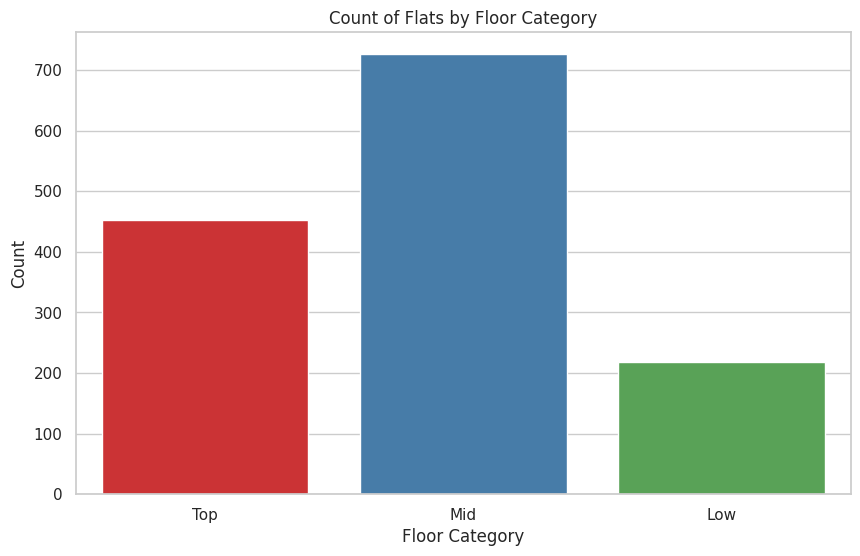

In [99]:
sns.set(style="whitegrid")

# 1. Histogram of Area
plt.figure(figsize=(10, 6))
sns.histplot(df['Area_sqft'], bins=30, kde=True, color='blue')
plt.title('Distribution of Flat Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Count')
plt.show()

# 2. Histogram of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='green')
plt.title('Distribution of Flat Price (Lakhs)')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Count')
plt.show()

# 3. Box plot of Price by Property_BHK
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property_BHK', y='Price', data=df, palette='Set2')
plt.title('Price Distribution by BHK')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Price (Lakhs)')
plt.show()

# 4. Bar plot of Floor_Category counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Floor_Category', data=df, palette='Set1')
plt.title('Count of Flats by Floor Category')
plt.xlabel('Floor Category')
plt.ylabel('Count')
plt.show()

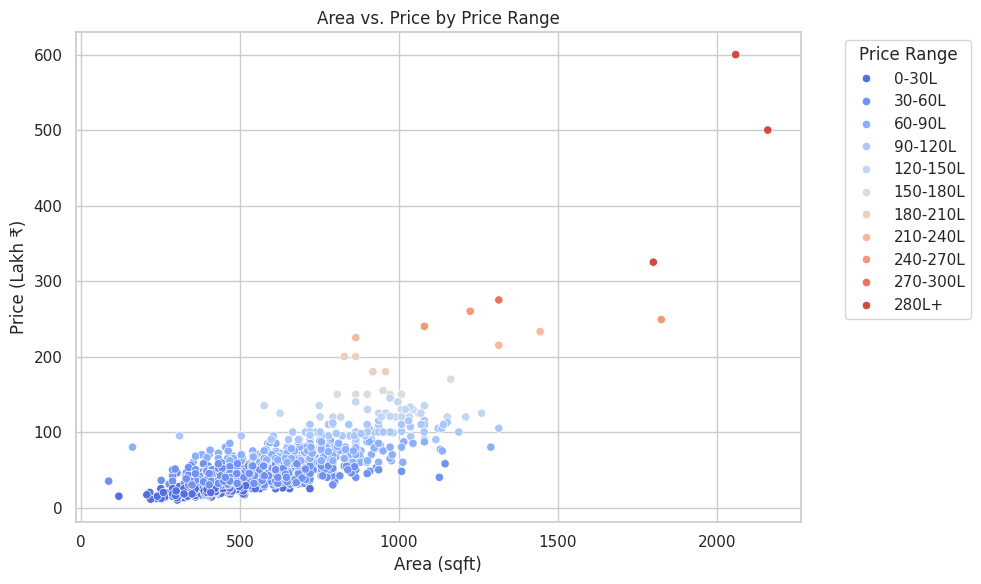

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area_sqft', y='Price', hue='Price_Range', palette='coolwarm')
plt.title('Area vs. Price by Price Range')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (Lakh ₹)')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
